# Notebook dedicated to Construct the oscillated MC spectrum of 8B solar Nue Neutrinos

The procedure to obtain the oscillated solar neutrino spectrum is as follows:
1) Obtain the survival probability for each simulated neutrino energy,
2) Perform a binary keep-and-delete on events using randon number generator that must be compared with the survival propability,


In [20]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from scipy.interpolate import interp1d

# Load Data

## MC B8 Nue Unoscillated

In [2]:
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/np_array_resume/'

true_energy_b8_nue = np.load(main_dir + 'parentKE1.npy')
recons_energy_b8_nue = np.load(main_dir + 'energy.npy')

## Survival Prob. as function of Energy

In [4]:
Pee_dir = '/home/joankl/data/solars/mc/PSelmaa/'
fname = 'pselmaa_test_sun_pee_B16_GS98_b8.txt'

PSelmaa_data = np.loadtxt(Pee_dir + fname, skiprows=1)
Pee = PSelmaa_data[:,1]
Pee_energy = PSelmaa_data[:,0]

# Pee interpolation through MC True Neutrino Energy

In [5]:
Pee_f = interp1d(Pee_energy, Pee, kind='linear', bounds_error=False, fill_value=0)  #function that describes the interpolation
Pee_int = Pee_f(true_energy_b8_nue) # Interpolation Values

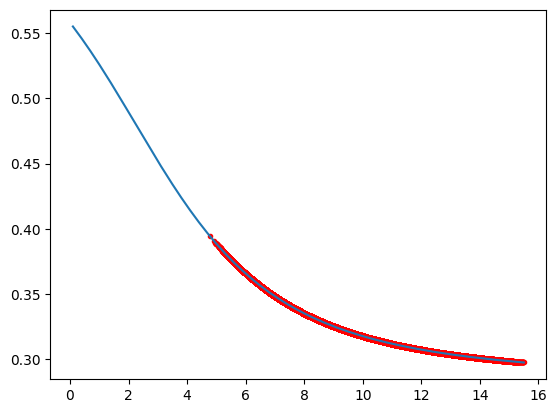

In [7]:
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.2


plt.plot(Pee_energy, Pee)
plt.scatter(true_energy_b8_nue, Pee_int, marker = '.', color = 'red')
plt.show()

# Keep-and-Delete Method to Simulate the Oscillations

Logic:
1) Create a vector (r_vec )of dimension N_evs of random numbers within the interval [0,1]
2) Create a mask through the condition Pee < r_vec. It means that the lowest Pee the lowest the chance of keeping events
3) Keep the events for the True mask, ignoring the events where the mask in False.

In [15]:
# ==== Create the random vector ====
N_ev = len(true_energy_b8_nue) # Number of entries
rng = np.random.default_rng(seed=42) # Seed for Reproducibility
r_vec = rng.random(N_ev) # Random vector generation

# ==== Event Selection ====
survival_mask = (r_vec < Pee_int)  #  Binary mask. If False the event has 'oscillated' and will be removed

osc_true_energy_b8_nue = true_energy_b8_nue[survival_mask]
osc_recons_energy_b8_nue = recons_energy_b8_nue[survival_mask]

In [16]:
N_ev

1649033

In [17]:
len(osc_true_energy_b8_nue)

534538

# Histograms of Unoscillated vs. Oscillated

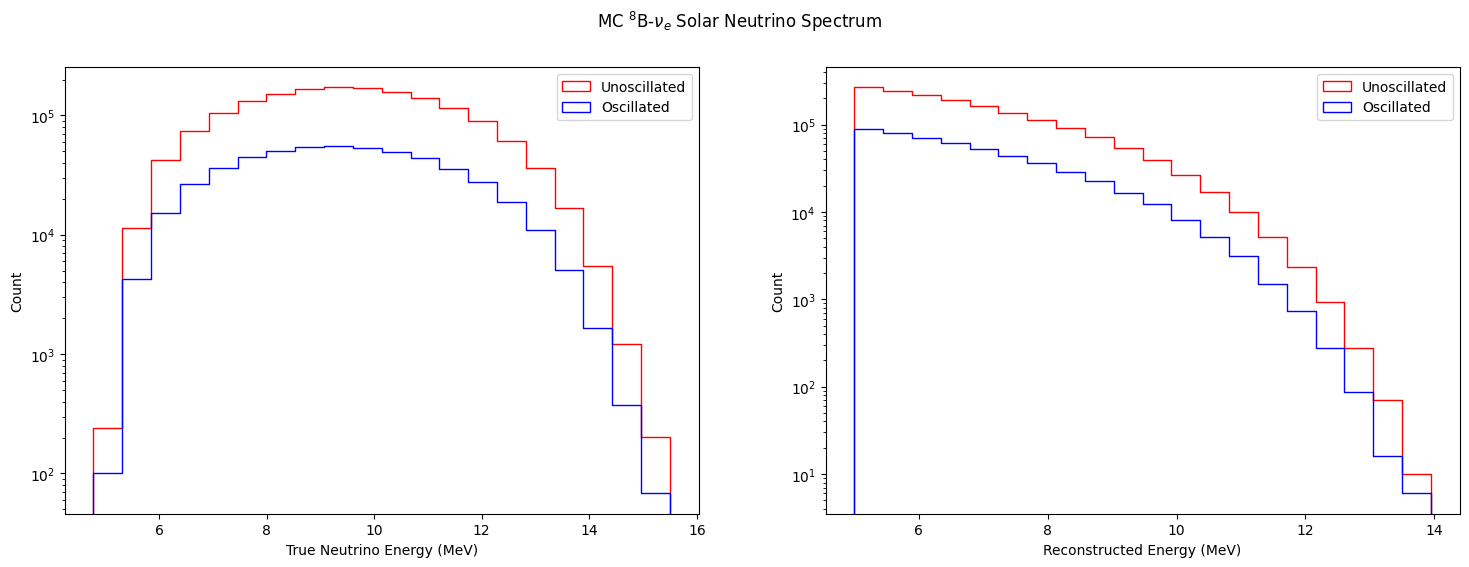

In [24]:
fig, axes = plt.subplots(1, 2,  figsize=(18, 5.8))

bins = 20

sn.histplot(true_energy_b8_nue, ax = axes[0], bins = bins, color = 'red', element = 'step', alpha = 0, label = 'Unoscillated')
sn.histplot(osc_true_energy_b8_nue, ax = axes[0], bins = bins, color = 'blue', element = 'step', alpha = 0, label = 'Oscillated')

sn.histplot(recons_energy_b8_nue, ax = axes[1], bins = bins, color = 'red', element = 'step', alpha = 0, label = 'Unoscillated')
sn.histplot(osc_recons_energy_b8_nue, ax = axes[1], bins = bins, color = 'blue', element = 'step', alpha = 0, label = 'Oscillated')

axes[0].set_xlabel('True Neutrino Energy (MeV)')
axes[0].set_yscale('log')
axes[0].legend(loc = 'best')

axes[1].set_xlabel('Reconstructed Energy (MeV)')
axes[1].set_yscale('log')
axes[1].legend(loc = 'best')

plt.suptitle(r'MC $^8$B-$\nu_e$ Solar Neutrino Spectrum')

plt.show()

# Save the Oscillated Spectrum

In [25]:
save = True

if save:
    save_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/np_array_resume/'
    fname = 'osc_energy'
    np.save(save_dir + fname, osc_recons_energy_b8_nue)